# Sample code for exercise 1-3
## Schmidt decomposition of a piture image

2020 Nov. Tsuyoshi Okubo

In this code, you can simulate SVD (Schmidt decomposition) of a $m^N$ dimensional vector created from a picture image. 

The input parameters are
* filename: file name of the input image
* $N$ : number of "site"
* $m$ : "local dimension". (Total vector dimension is $m^N$.)

The original $(X, Y)$ pixel image is firstly transformed into the gray scale. Then, from it we cut $(m^{N/2}, m^{N/2})$ region for even $N$. In the case of odd $N$, we cut $(m^{(N-1)/2}, m^{(N+1)/2})$. We can consider the trimmed image as am $m^N$ dimensional vector, which is used as the input vector in the following analysis.

In the appendix, you can also see the scaling of the entanglement entropy for your picture.


In [1]:
import numpy as np
import scipy.linalg as linalg
%matplotlib inline
from matplotlib import pyplot
from PIL import Image ## Python Imaging Library

In [2]:
## Set parameters
filename = "sample.jpg"
N = 16 ## set "system size" N 
m = 2 ## vector size m: total dimension is m^N

The original $(X, Y)$ pixel image is firstly transformed into the gray scale. Then, from it we cut $(m^{N/2}, m^{N/2})$ region and make $m^N$ dimensional vector.

In [3]:
img = Image.open(filename) ## load image
img_gray = img.convert("L") ## convert to grayscale

img_x, img_y = img_gray.size
if N % 2 == 0:
    new_x = m**(N//2)
    new_y = m**(N//2)
else:
    new_x = m**((N-1)//2)
    new_y = m**((N+1)//2)

## trimming
img_gray_trimmed = img_gray.crop(((img_x - new_x)//2, (img_y - new_y)//2, (img_x + new_x)//2, (img_y + new_y)//2))

img_gray_trimmed.save("./gray_trimmed.png") ## save grayscale image

img_vec = np.array(img_gray_trimmed,dtype=float).reshape(-1)

print("Parameters: N, m = "+repr(N)+", "+repr(m))
print("Input file: " + filename) 
print("Original size: "+repr(img_gray.size)) ## print array shape
print("Trimmed size: " +repr(img_gray_trimmed.size))

Parameters: N, m = 16, 2
Input file: sample.jpg
Original size: (1024, 768)
Trimmed size: (256, 256)


Plot target images.

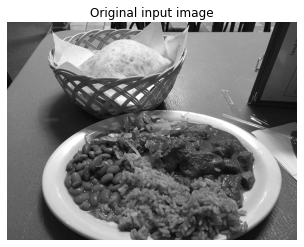

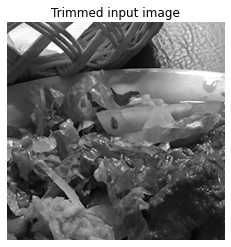

In [4]:
pyplot.axis("off")
pyplot.title("Original input image")
pyplot.imshow(img_gray,cmap='gray')
pyplot.show()

pyplot.axis("off")
pyplot.title("Trimmed input image")
pyplot.imshow(img_gray_trimmed,cmap='gray')
pyplot.show()

Then we transforme it  into a $m^{N/2} \times m^{N/2}$ matrix. In the present case, the obtained matrix is identical with the previous matrix representing the (trimmed) image. We perform the singular value decomposition of it; Thus the singular values are the same with the svd of the picture image treated in the previous lecture.

In [5]:
## Make matrix from the image vector
Mat = img_vec[:].reshape(m**(N//2),m**(N-N//2))

## SVD
s = linalg.svdvals(Mat)

The singular values are normalized as $\sum_i s_i^2 = 1$. As explained in Ex1-1, the squared sum of the singualr values is related to the norm of the vector $$ \lVert \vec{v} \rVert = \sqrt{\mathrm{Tr}~{MM^T}} = \sqrt{\sum_i s_i^2}. $$

Then the entanglement entropy is calculated as 
$$ S = -\sum_i s_i^2 \log s_i^2. $$

In [6]:
## Entanglement entropy
norm = np.sqrt(np.sum(s**2))
print("Norm of the vector = "+ repr(norm))

s /= norm
EE = -np.sum(s**2*np.log(s**2))
print("Entanglement entropy = " + repr(EE))

Norm of the vector = 27986.013345955504
Entanglement entropy = 0.9494402492802121


Finally, we plot the singular value spectrum. Note that, in the case of a random vector, we expect the volume low of the entanglement entorpy. 
Corresponding to this fact, the singular values decrease slowly in the case of a random vector.

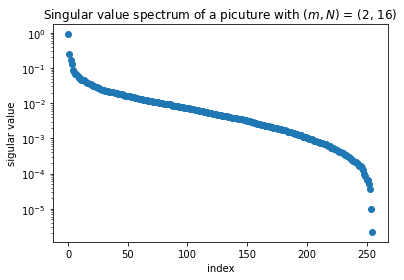

In [7]:
## plot singular values
pyplot.title("Singular value spectrum of a picuture with $(m, N)$ = ("+repr(m) +", "+repr(N)+")")
pyplot.plot(np.arange(m**(N//2),dtype=int),s,"o")
pyplot.xlabel("index")
pyplot.ylabel("sigular value")
pyplot.yscale("log")
pyplot.show()


## Appendix: Scaling of the entanglement entorpy
In the following section, you can check the scaling of the entanglement entropy for random vectors.

Here we use the same picutre and $m$ which used in main part and vary $N$ from N_min to N_max with N_step interval.

In [8]:
N_min = 4
N_max = 18
N_step = 2

N_list = np.arange(N_min,N_max+1,N_step,dtype=int)

Here we calculate the entanglement entropy for each $N$.

In [9]:
EE_list = []
for N in N_list:
    img_x, img_y = img_gray.size
    if N % 2 == 0:
        new_x = m**(N//2)
        new_y = m**(N//2)
    else:
        new_x = m**((N-1)//2)
        new_y = m**((N+1)//2)

    ## trimming
    img_gray_trimmed = img_gray.crop(((img_x - new_x)//2, (img_y - new_y)//2, (img_x + new_x)//2, (img_y + new_y)//2))

    Mat = np.array(img_gray_trimmed,dtype=float).reshape(m**(N//2),m**(N-N//2))

    ## SVD
    s = linalg.svdvals(Mat)
    norm = np.sqrt(np.sum(s**2))
    

    s /= norm
    EE_list.append(-np.sum(s**2*np.log(s**2)))


Finally, we plot $N$ dependence of the entanglement entorpy. Typically, the entanglement entropy increases as $N$ is  increased. However, you may see the behavior of the entanglement entropy is not smooth, compared with examples in Ex1-1 and Ex1-2. One of the reasons is here we treat only a specific image. When we consider statistical average over many images, we may see more meaningful tendency in the scaling.

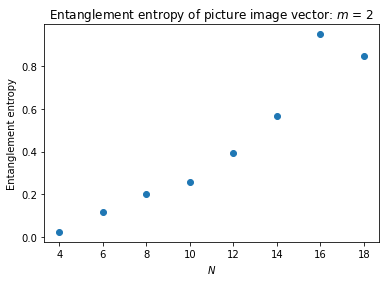

In [10]:
## plot of the entanglement entropy
pyplot.title("Entanglement entropy of picture image vector: $m$ = "+repr(m))
pyplot.plot(N_list,EE_list,"o")
pyplot.xlabel("$N$")
pyplot.ylabel("Entanglement entropy")
pyplot.show()